<a href="https://www.kaggle.com/code/averma111/pss3e18-widedeep-eda?scriptVersionId=135078501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
MULTILABEL CLASSIFICATION USING PYTORCH WIDEDEEP FRAMEWORK
</p>
</div

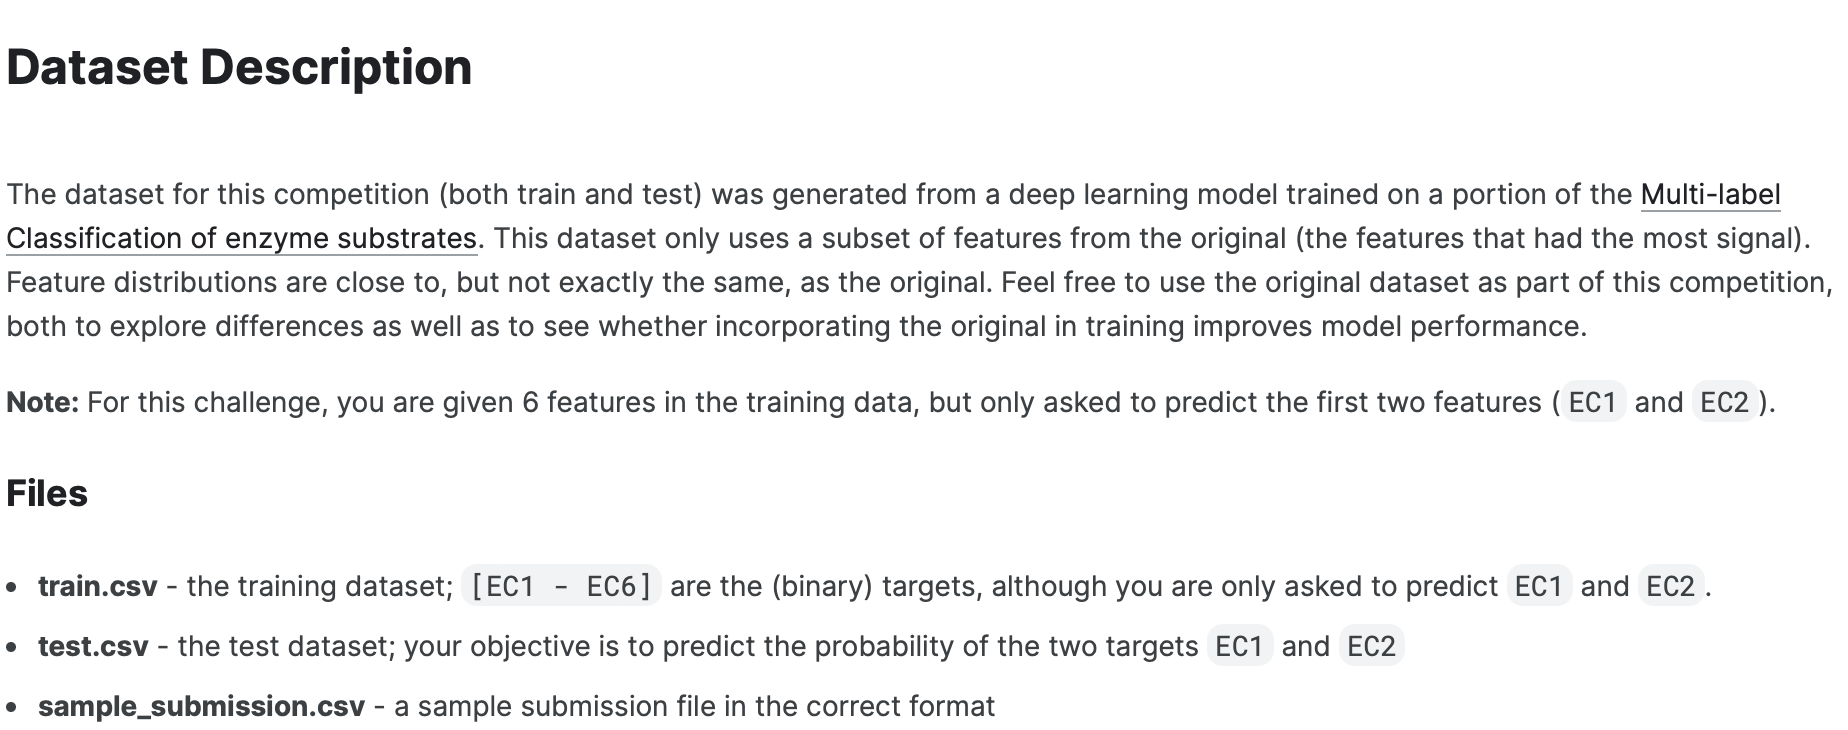

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
INSTALLING THE PYTOCH WIDE DEEP LIBRARY
</p>
</div

In [50]:
%%capture
!pip install pytorch-widedeep

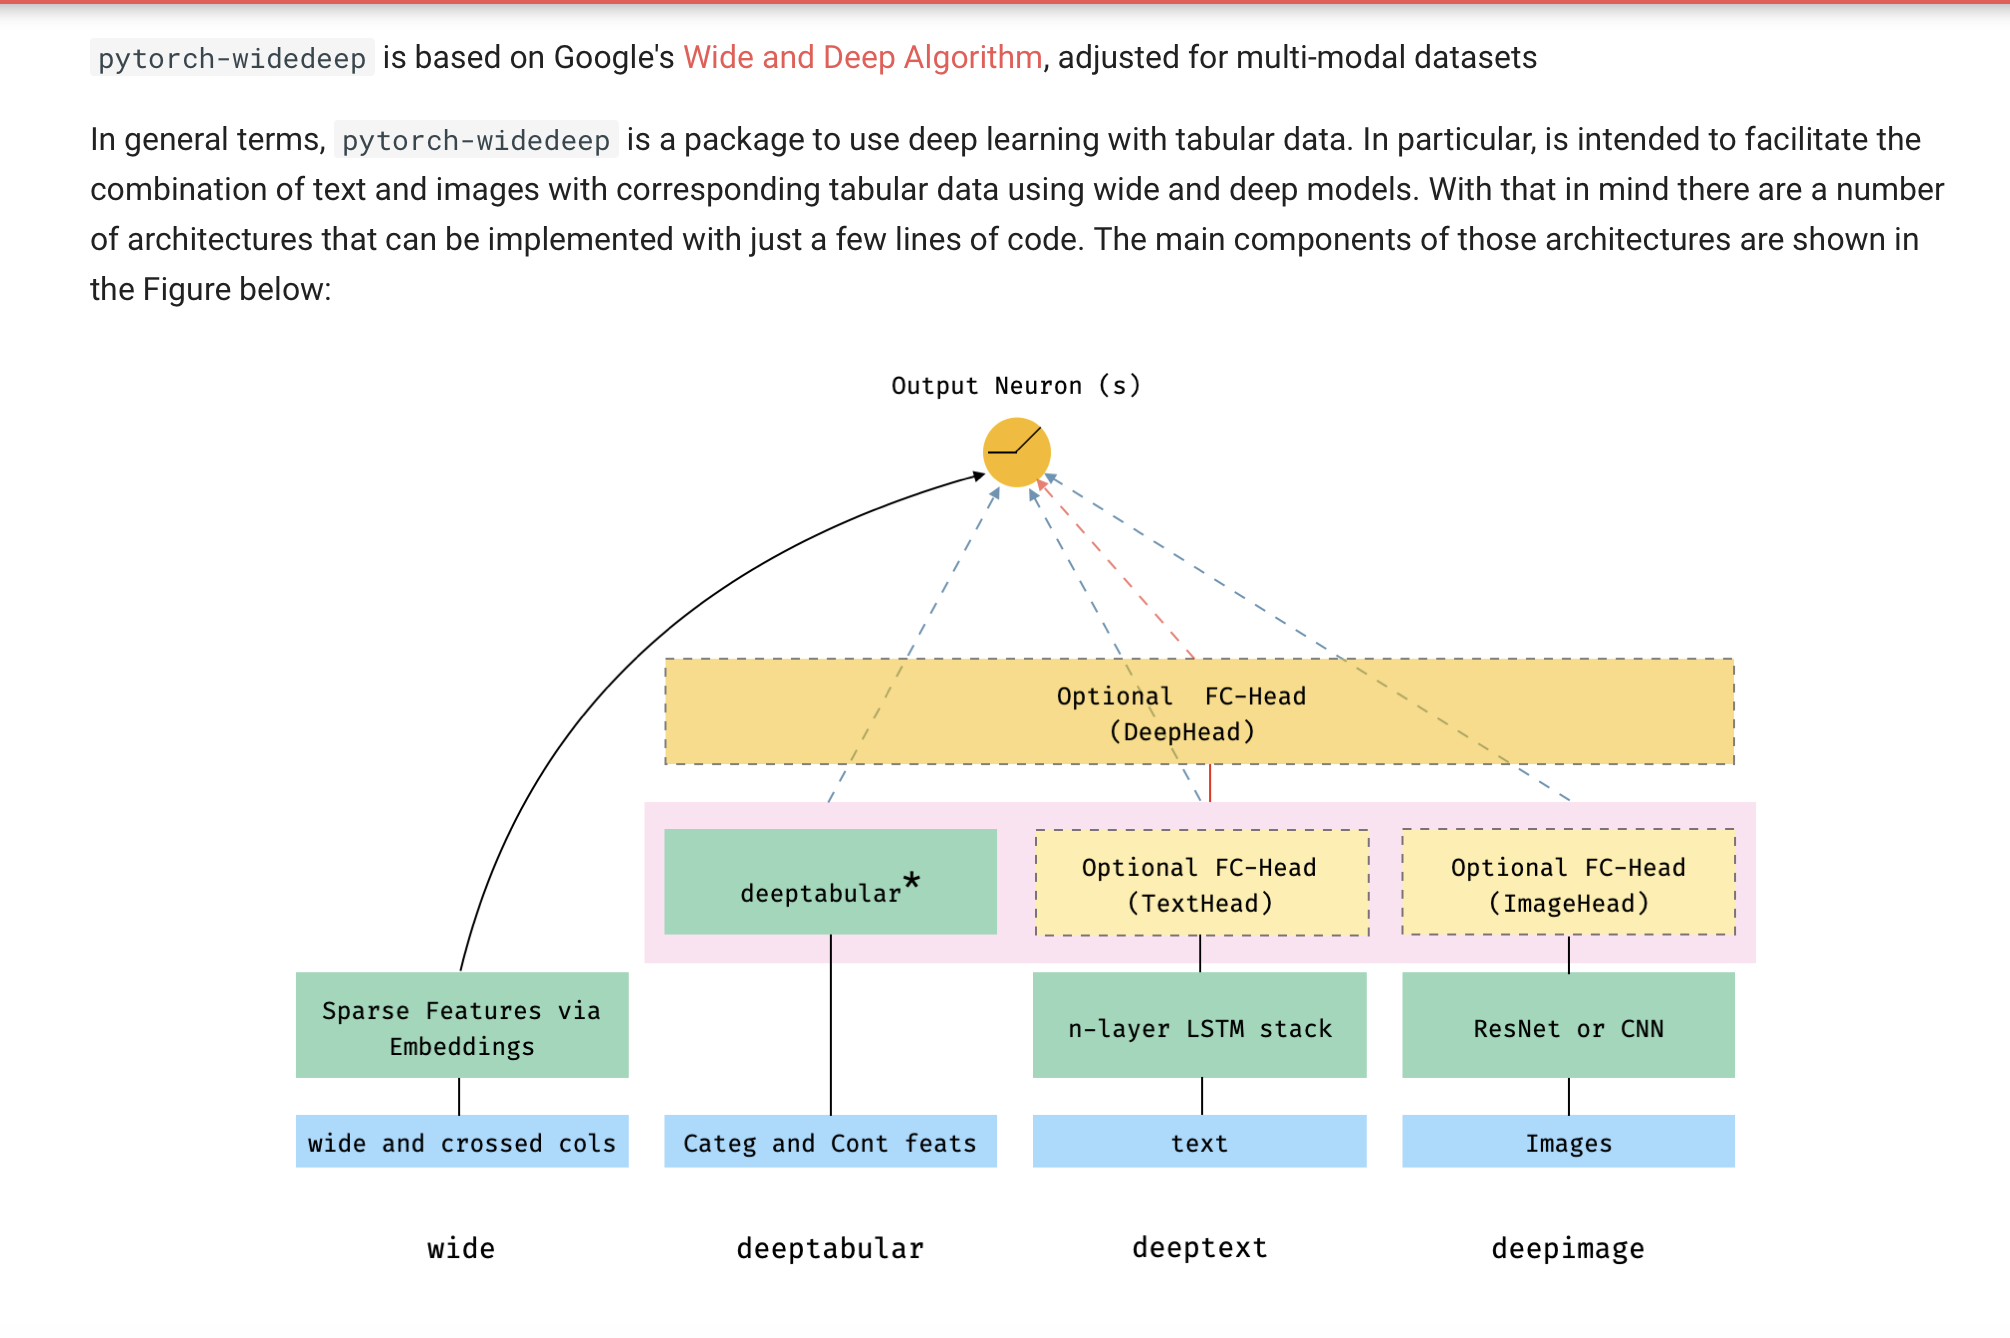

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
IMPORTING OTHER NECESSARY PACKAGES
</p>
</div

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os


import torch
from pytorch_widedeep.preprocessing import WidePreprocessor, TabPreprocessor
from pytorch_widedeep.training import Trainer
from pytorch_widedeep.models import Wide, TabMlp, WideDeep,TabResnet
from pytorch_widedeep.metrics import R2Score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import itertools

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
DATA ACQUISITION
</p>
</div

In [52]:
class Datapreparation(object):
    
    def __init__(self,root_path):
        self.root_path = root_path
        
    def get_dataframe(self,filename):
        return pd.read_csv(os.path.join(self.root_path,filename))
    
    def summary(self,text, df):
        summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary['null'] = df.isnull().sum()
        summary['unique'] = df.nunique()
        summary['min'] = df.min()
        summary['median'] = df.median()
        summary['max'] = df.max()
        summary['mean'] = df.mean()
        summary['std'] = df.std()
        summary['duplicate'] = df.duplicated().sum()
        return summary
    
    

    
data = Datapreparation('/kaggle/input/playground-series-s3e18')
train=data.get_dataframe('train.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
TRAIN SUMMARY
</p>
</div

In [53]:
data.summary('train',train)

,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,14838,0.000000,7418.500000,14837.000000,7418.500000,4283.505982,0
BertzCT,float64,0,2368,0.000000,290.987941,4069.959780,515.153604,542.456370,0
Chi1,float64,0,1259,0.000000,6.485270,69.551167,9.135189,6.819989,0
Chi1n,float64,0,3157,0.000000,4.052701,50.174588,5.854307,4.647064,0
Chi1v,float64,0,3306,0.000000,4.392859,53.431954,6.738497,5.866444,0
Chi2n,float64,0,3634,0.000000,2.970427,32.195368,4.432570,3.760516,0
Chi2v,float64,0,3725,0.000000,3.242775,34.579313,5.253221,4.925065,0
Chi3v,float64,0,3448,0.000000,1.948613,22.880836,3.418749,3.436208,0
Chi4n,float64,0,2930,0.000000,1.073261,16.072810,1.773472,1.865898,0
EState_VSA1,float64,0,719,0.000000,17.353601,363.705954,29.202823,31.728679,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
TRAIN DATASET
</p>
</div

In [54]:
train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
PLOTTING THE LABELS WITH 1s
</p>
</div

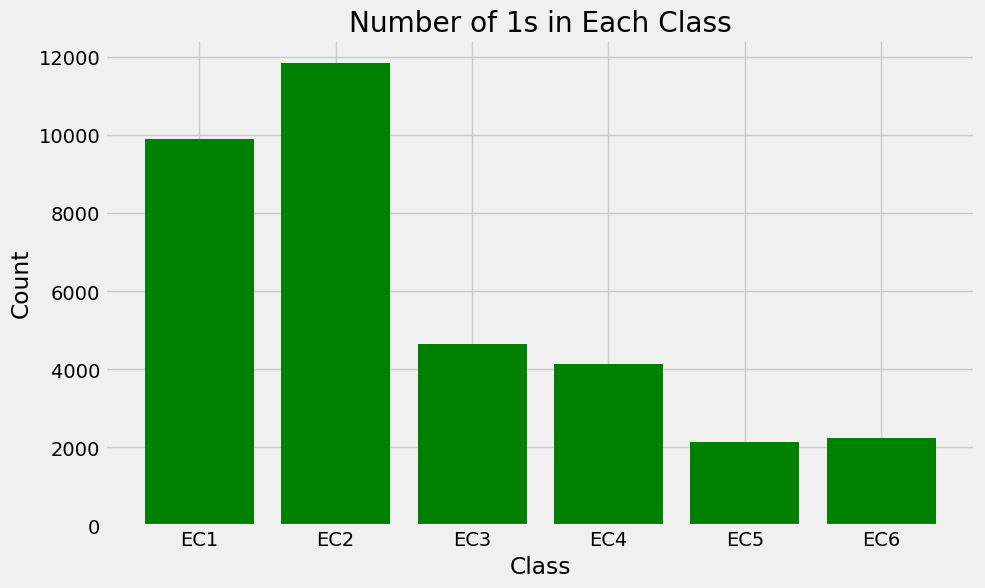

In [55]:
# Define the labels
labels = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

# Count the number of 1s in each class
counts = [train[label].sum() for label in labels]

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='green')
plt.title('Number of 1s in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
PAIR PLOT FOR CATEGORICAL COLUMNS
</p>
</div

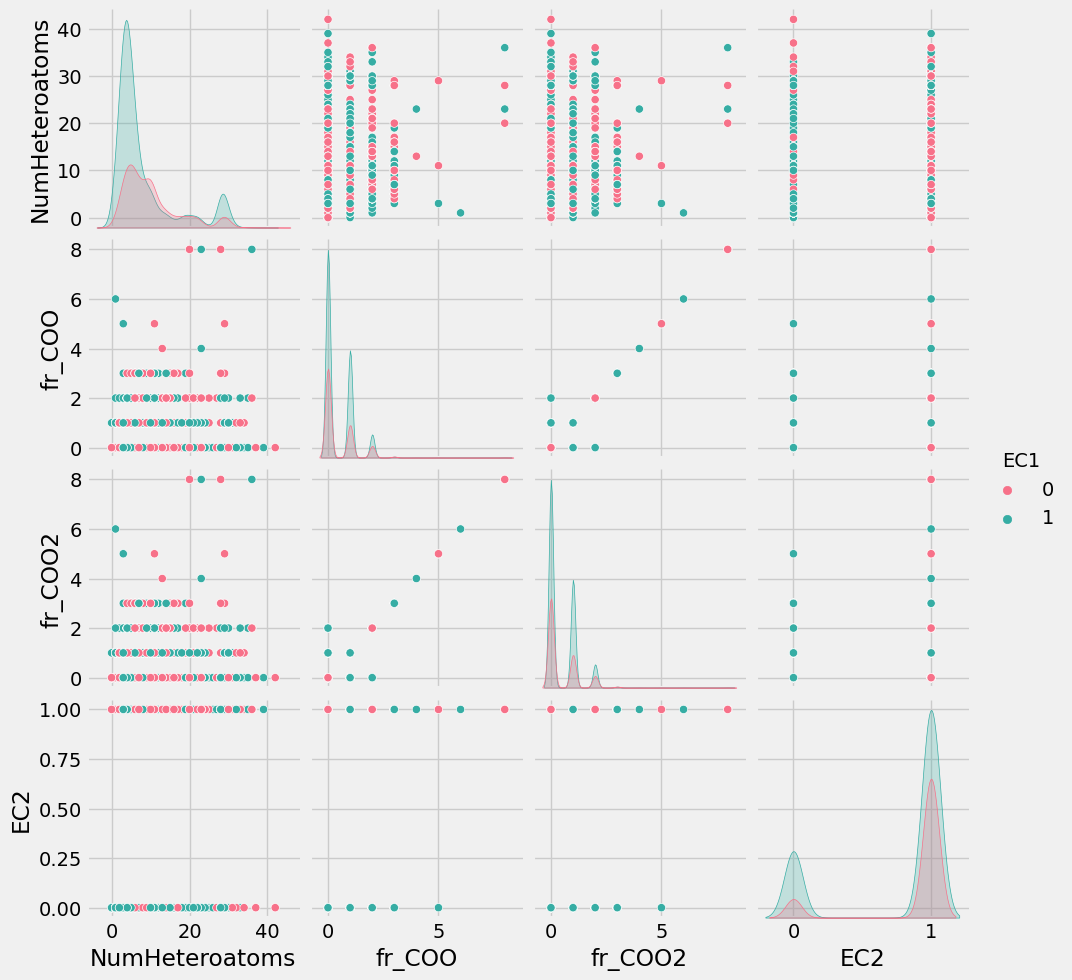

In [56]:
cat_cols = ['NumHeteroatoms','fr_COO','fr_COO2','EC1','EC2'] 
sns.pairplot(train[cat_cols], hue = 'EC1', palette="husl")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
HISTOGRAM FOR CONTINOUS VARIABLES
</p>
</div

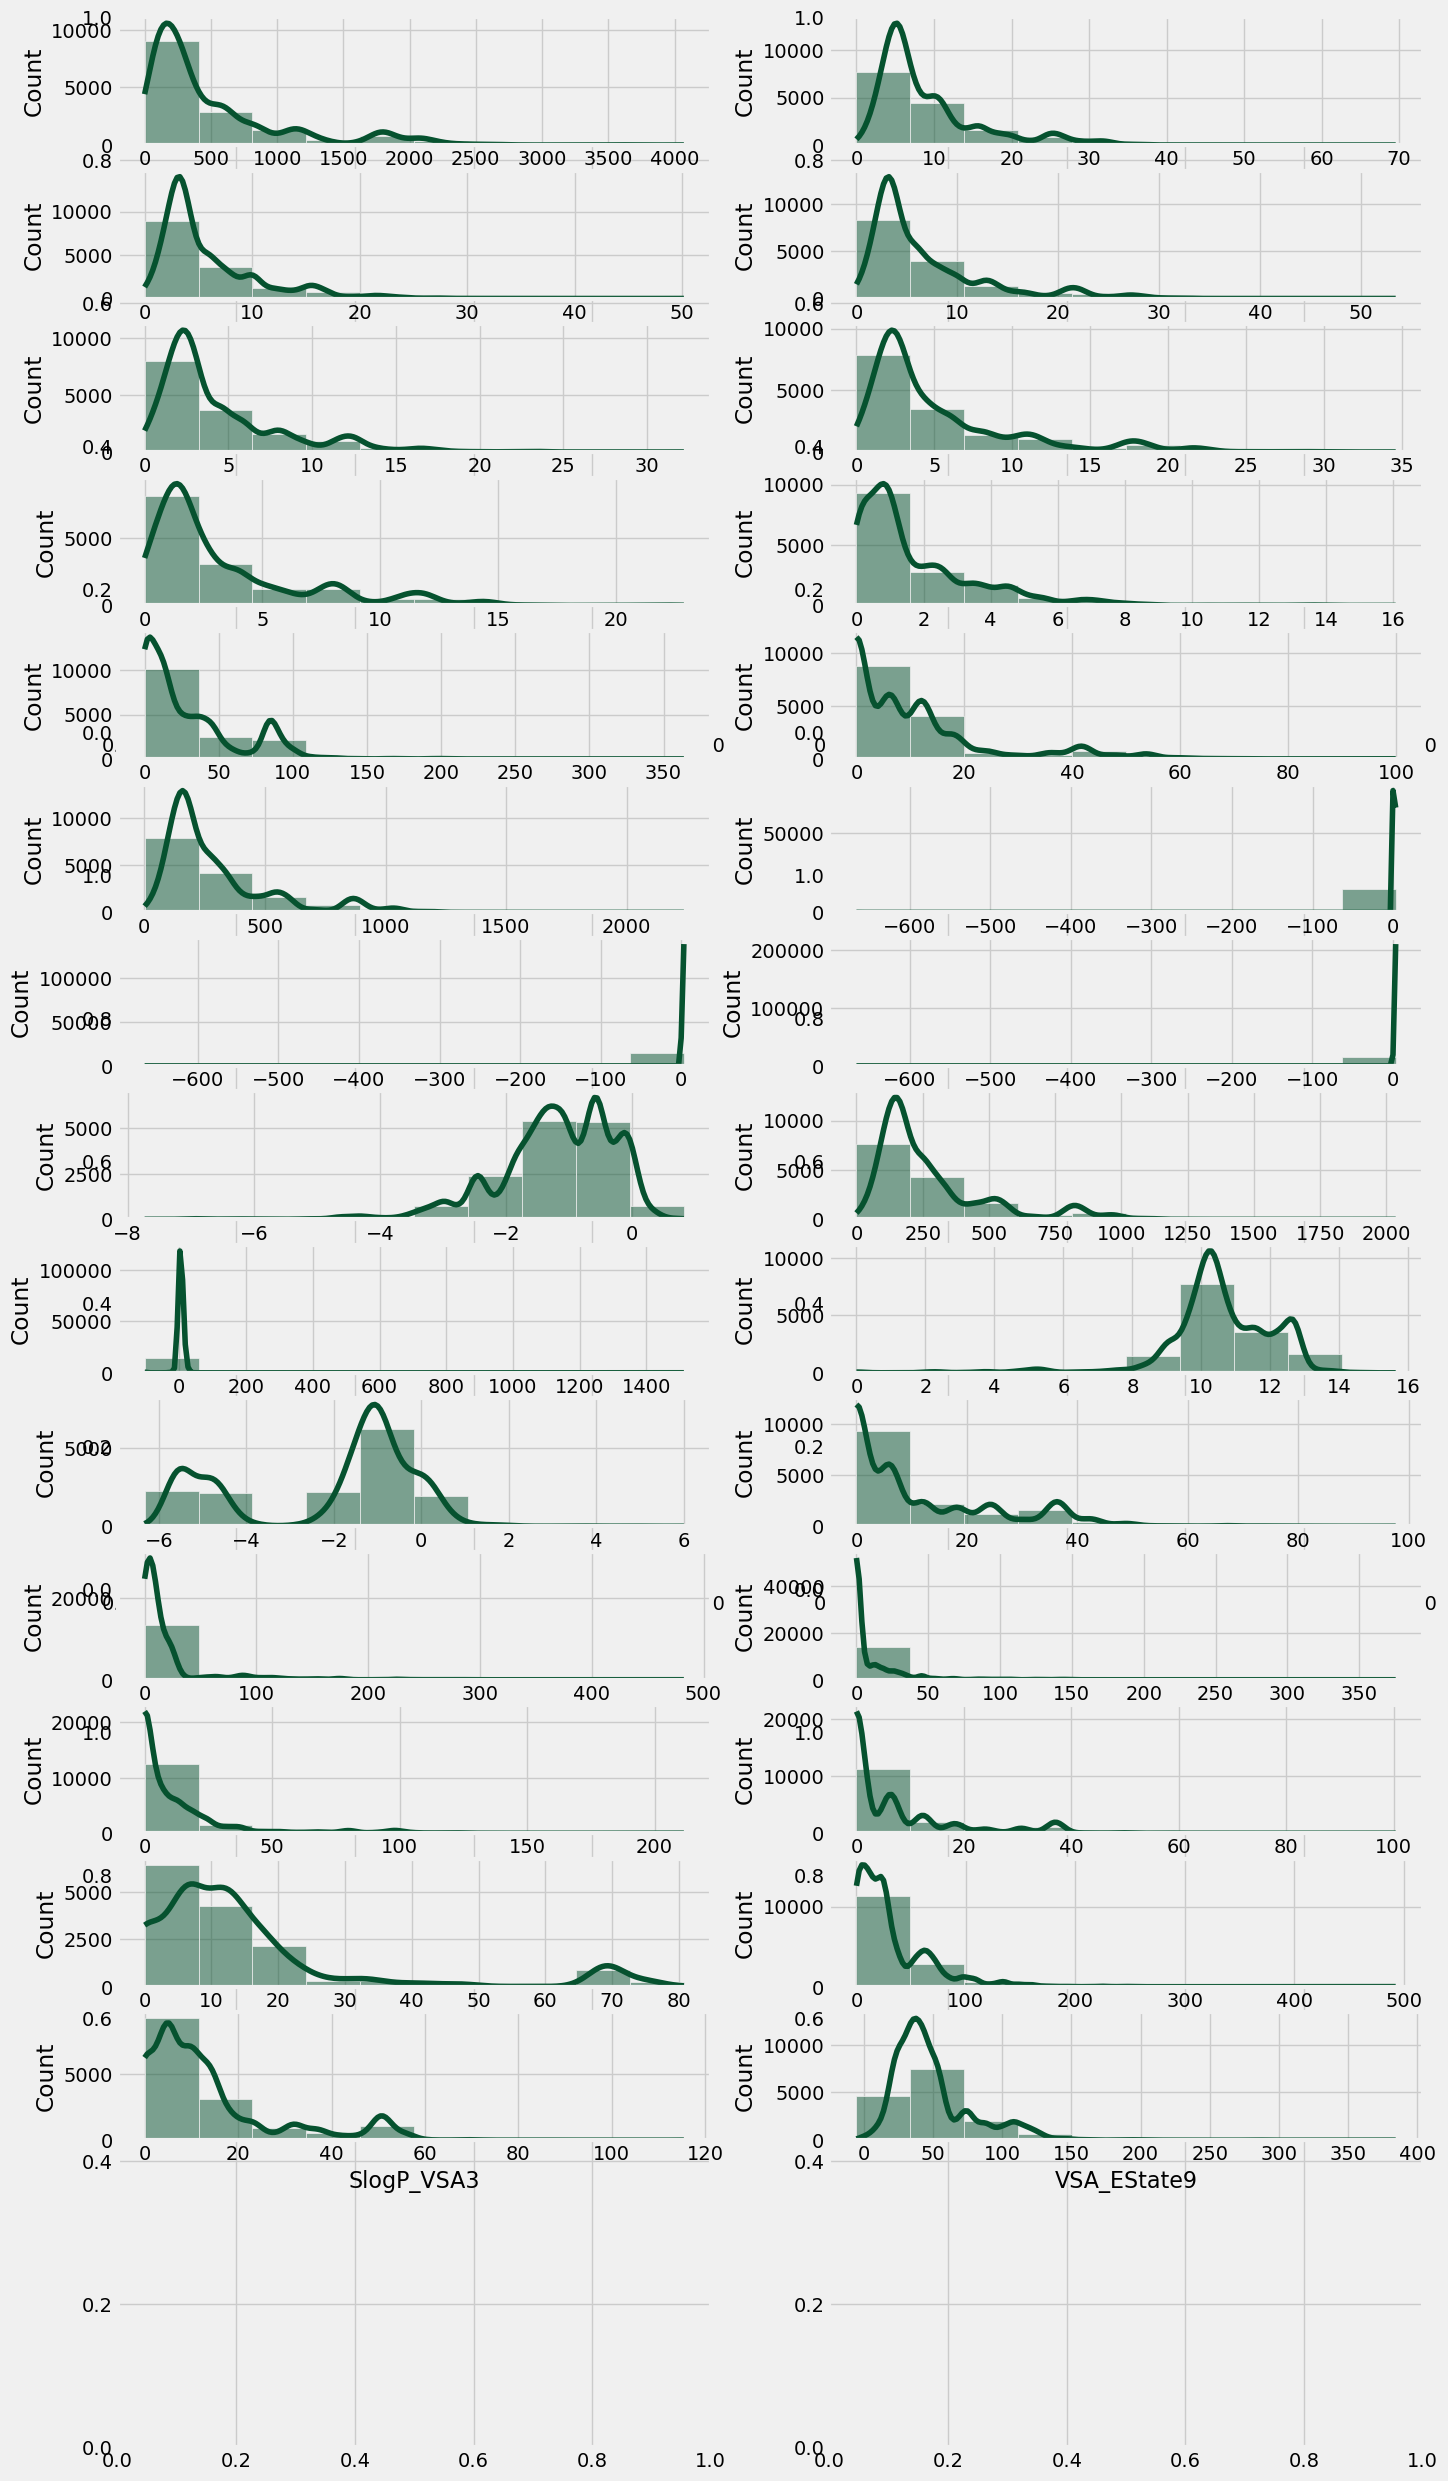

In [57]:
fig, axes = plt.subplots(3,2,figsize=(15, 30))
target = ['EC1','EC2']
for i, cols in enumerate(train.drop(target, axis = 1).select_dtypes(include = 'float64').columns):
    fig.add_subplot(16,2, i + 1)
    plot = sns.histplot(train[cols], kde = True, color = '#06522f', stat = 'count', bins=10)
    plot.set_xlabel(cols, fontsize = 16)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
REMOVE NOT REQUIRED COLUMNS
</p>
</div

In [58]:
train.drop(["id",'EC3','EC4','EC5','EC6'], axis=1, inplace=True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
SETTING CONTINUOUS, CATEGORICAL AND TARGET COLUMN FOR WIDEDEEP MLP
</p>
</div

In [59]:
# Categorical columns
cat_embed_cols = ['fr_COO','fr_COO2','NumHeteroatoms']
# Continous columns
continuous_cols = ['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
        'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9']

# TARGET
target_col = ['EC1','EC2']
target = train[target_col].values
target=target.astype(float)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
INSTANTIATING THE WIDEDEEP PREPROCESSOR WITH EMBEDDINGS
</p>
</div

In [60]:
# deeptabular
tab_preprocessor = TabPreprocessor(continuous_cols=continuous_cols,cat_embed_cols=cat_embed_cols)
X_tab = tab_preprocessor.fit_transform(train)
tab_preprocessor.cat_embed_input,X_tab.shape

([('fr_COO', 8, 5), ('fr_COO2', 8, 5), ('NumHeteroatoms', 40, 13)],
 (14838, 31))

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
DEFINING THE MULTI LEVEL PERCEPTRON
</p>
</div

In [88]:
# Model 
tab_resnet = TabResnet(
    column_idx=tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    cat_embed_dropout=0.1,
    continuous_cols=continuous_cols,
    mlp_hidden_dims=[64, 32],
    mlp_dropout=0.5,
    mlp_activation="leaky_relu"
)

tab_model = WideDeep(deeptabular=tab_resnet,pred_dim=2)
tab_model

WideDeep(
  (deeptabular): Sequential(
    (0): TabResnet(
      (cat_and_cont_embed): DiffSizeCatAndContEmbeddings(
        (cat_embed): DiffSizeCatEmbeddings(
          (embed_layers): ModuleDict(
            (emb_layer_fr_COO): Embedding(9, 5, padding_idx=0)
            (emb_layer_fr_COO2): Embedding(9, 5, padding_idx=0)
            (emb_layer_NumHeteroatoms): Embedding(41, 13, padding_idx=0)
          )
          (embedding_dropout): Dropout(p=0.0, inplace=False)
        )
        (cont_norm): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (encoder): DenseResnet(
        (dense_resnet): Sequential(
          (lin_inp): Linear(in_features=51, out_features=200, bias=False)
          (bn_inp): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (block_0): BasicBlock(
            (resize): Sequential(
              (0): Linear(in_features=200, out_features=100, bias=False)
              (1): BatchNorm

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
INSTANTIATING THE TRAINER MODULE
</p>
</div

In [113]:
roc = ROC(task="multiclass", num_classes=2)

tab_trainer = Trainer(
    model=tab_model,
    objective="multiclass",
    optimizers=torch.optim.Adam(tab_model.parameters(), lr=0.0001),
   metrics=[R2Score]
)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
FITTING THE MODEL
</p>
</div

In [114]:
tab_trainer.fit(X_tab=X_tab, 
                target=target, 
                n_epochs=10,
                batch_size=32, 
                val_split=0.2,
                finetune=True,
                finetune_epochs=2,
                finetune_max_lr=0.01
)

Training deeptabular for 2 epochs


epoch 2: 100%|██████████| 371/371 [00:07<00:00, 52.93it/s, loss=1, metrics={'r2': 0.6749}]    


Fine-tuning (or warmup) of individual components completed. Training the whole model for 10 epochs


valid: 100%|██████████| 93/93 [00:01<00:00, 82.73it/s, loss=0.996, metrics={'r2': 0.677}] 


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
TEST DATASET PREPARTION
</p>
</div

In [115]:
test=data.get_dataframe('test.csv')
test.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
TEST DATA PRE PROCESSING
</p>
</div

In [116]:
#X_wide_te = wide_preprocessor.transform(test_updated)
X_tab_te = tab_preprocessor.transform(test)
preds = tab_trainer.predict_proba(X_tab=X_tab_te)
print(f'The  probabilities are {preds}')

predict: 100%|██████████| 310/310 [00:02<00:00, 135.19it/s]


The  probabilities are [[0.38189954 0.61810046]
 [0.49705404 0.502946  ]
 [0.49973845 0.5002615 ]
 ...
 [0.33904266 0.66095734]
 [0.33852106 0.66147894]
 [0.38288417 0.6171158 ]]


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
MAKING PREDICTION PROBABILITIES
</p>
</div

In [117]:
preds=preds.tolist()
ec1,ec2=[],[]
for element in preds:
    ec1.append(element[0])
    
for element in preds:
    ec2.append(element[1])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
SUBMISSIONS
</p>
</div

In [118]:
class Submit:
    
    def submit_predictions(self,test_updated):
        df_submit = pd.DataFrame(data={'id': test['id'],'EC1':ec1,'EC2':ec2})
        df_submit.to_csv('submission.csv',index=False)
        print('Submission Completed!!')
        return df_submit
        
        
submit = Submit()
df_submit=submit.submit_predictions(test)

Submission Completed!!


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c5b8;
           font-size:110%;
           font-family:sans-serif;
           letter-spacing:0.2px">

<p style="padding: 20px;
              color:black;">
SUBMISSION VERIFICATIONS
</p>
</div

In [120]:
df_submit

,id,EC1,EC2
0,14838,0.381900,0.618100
1,14839,0.497054,0.502946
2,14840,0.499738,0.500261
3,14841,0.480920,0.519080
4,14842,0.512740,0.487260
...,...,...,...
9888,24726,0.485012,0.514988
9889,24727,0.483968,0.516032
9890,24728,0.339043,0.660957
9891,24729,0.338521,0.661479
